#  Movie profits

### Data source: 
Requested data from <a href=https://www.the-numbers.com/>The Numbers</a> (of OpusData) and <a href='https://www.usinflationcalculator.com'>Inflation Calcuation</a>

## Module Imports and custom functions


In [1]:
%matplotlib inline
from data_preprocess import *
from sns_fig_funcs import *

<p> </p>

### Load, Clean, and Adjust for Inflation
 

In [2]:
movie_data = load_clean_data()
movie_data = movie_data.sort_values(by=['profit'], ascending=False)
display(movie_data.head())
display(movie_data.describe(percentiles=[0.5]))

,title,year,budget,rating,creative,source,genre,time,timebin,profit,sequel
695,Avatar,2009,425000000,PG-13,Science Fiction,Original Screenplay,Action,162.0,160,2821.614335,0.0
1641,Star Wars Ep. VII: The Force Awakens,2015,306000000,PG-13,Science Fiction,Original Screenplay,Adventure,136.0,130,1897.579985,1.0
1895,Avengers: Infinity War,2017,300000000,PG-13,Super Hero,Based on Comic/Graphic Novel,Action,156.0,150,1836.237566,1.0
1475,Jurassic World,2014,215000000,PG-13,Science Fiction,Based on Fiction Book/Short Story,Action,124.0,120,1558.600237,1.0
1108,The Avengers,2011,225000000,PG-13,Super Hero,Based on Comic/Graphic Novel,Action,143.0,140,1479.118666,0.0


,year,budget,time,profit,sequel
count,1936.000000,1.936000e+03,1822.000000,1936.000000,1934.000000
mean,2011.261880,5.342857e+07,109.396817,120.098410,0.152534
std,3.457548,5.368562e+07,19.644955,223.861766,0.359630
min,2006.000000,1.000000e+07,0.000000,-130.331286,0.000000
50%,2011.000000,3.275000e+07,108.000000,41.586805,0.000000
max,2018.000000,4.250000e+08,201.000000,2821.614335,1.000000



## Budget vs Profit

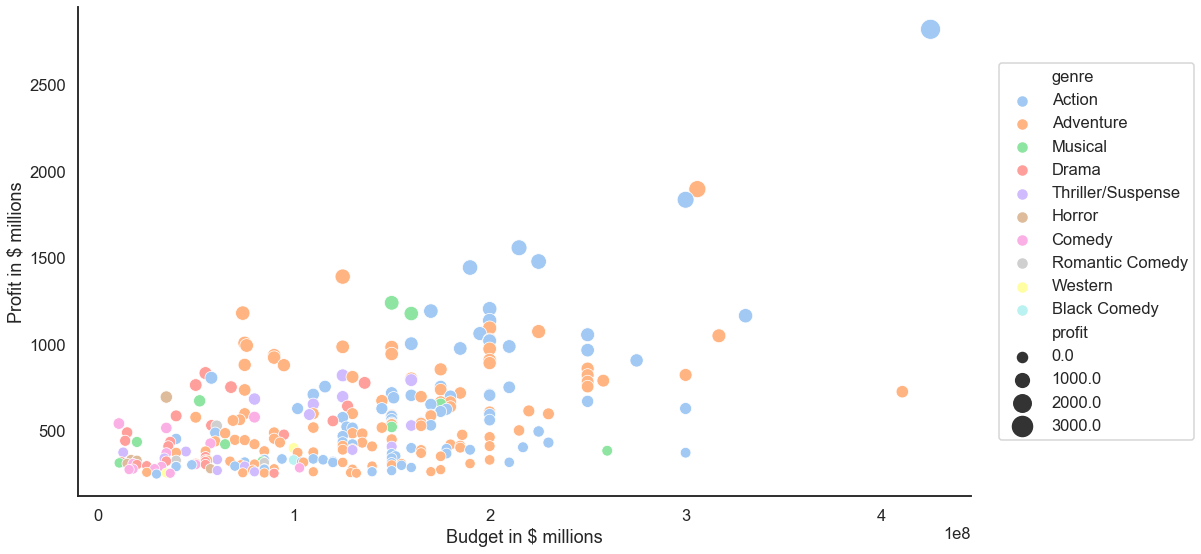

In [3]:
data_scatter(movie_data)

## Top 5 ways to maximize profits at box office

### Genre

profit                        
                 count        mean         std
genre                                         
Musical             25  273.391661  357.784664
Adventure          334  237.633767  297.947790
Action             311  213.795302  341.345544
Horror             104   80.128677  108.196012
Romantic Comedy     82   79.012403   94.367589

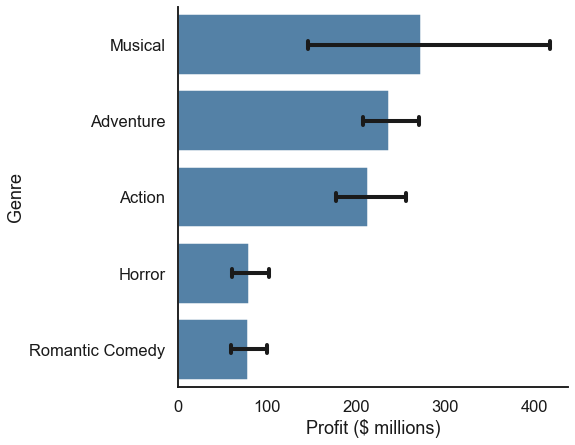

In [4]:
display(groupby_aggr(movie_data, 'genre').head())
data_bar_graph(movie_data,'genre')

### MPAA Ratings

profit                        
        count        mean         std
rating                               
PG        311  176.619324  248.657440
G          36  176.078084  224.246807
PG-13     777  162.936294  279.544312
NC-17       1   62.257781         NaN
R         748   57.984576  110.005305

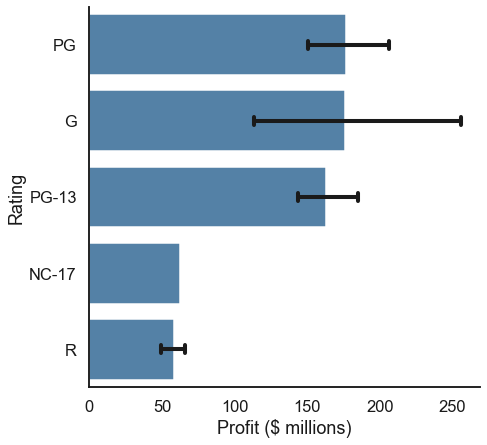

In [5]:
display(groupby_aggr(movie_data,'rating').head())
data_bar_graph(movie_data,'rating')

### Narrative

profit                        
                      count        mean         std
creative                                           
Super Hero               60  507.062576  389.500510
Kids Fiction            172  230.246176  278.984790
Science Fiction         190  198.699924  343.498027
Fantasy                 198  170.357489  263.606026
Contemporary Fiction    866   77.124197  132.635597

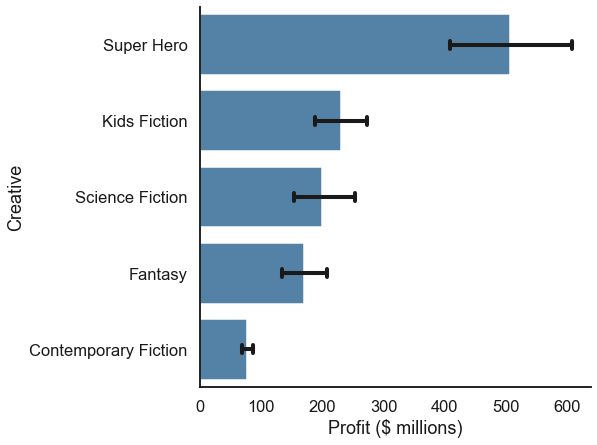

In [6]:
display(groupby_aggr(movie_data,'creative').head())
data_bar_graph(movie_data,'creative')

### Inspiration (Based on)

profit                        
                      count        mean         std
source                                             
 Theme Park Ride          4  805.621228  201.369654
Spin-Off                 14  451.317858  343.470105
 Comic/Graphic Novel     98  337.671858  373.220612
 TV                      60  224.797212  244.649247
 Musical or Opera         4  183.673986  331.982998

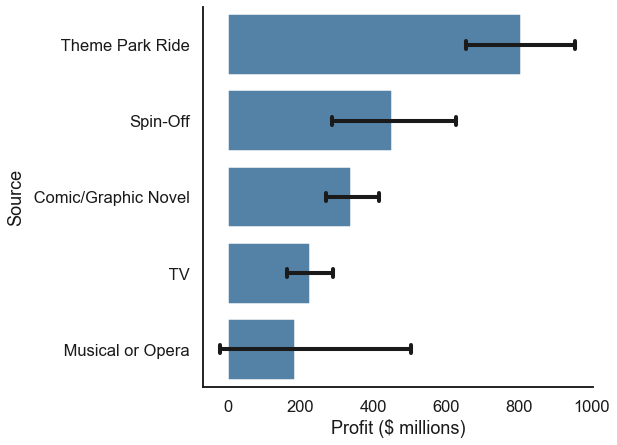

In [7]:
movie_data.source = movie_data.source.apply(lambda x: x.replace('Based on','') if isinstance(x,str) else x)
display(groupby_aggr(movie_data,'source').head())
data_bar_graph(movie_data,'source')

### Do we really want to sit in the movie that long?

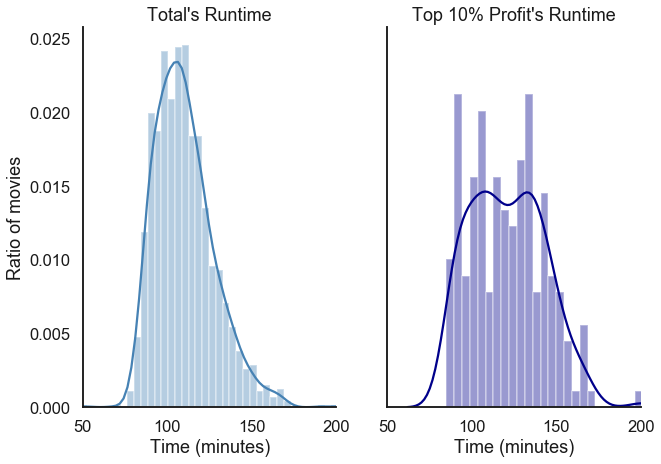

In [8]:
data_distribution(movie_data)

profit                        
         count        mean         std
timebin                               
200          1  784.955375         NaN
160         16  531.488089  700.612104
150         27  373.142255  471.699767
140         60  330.652833  384.993650
50           1  273.583209         NaN

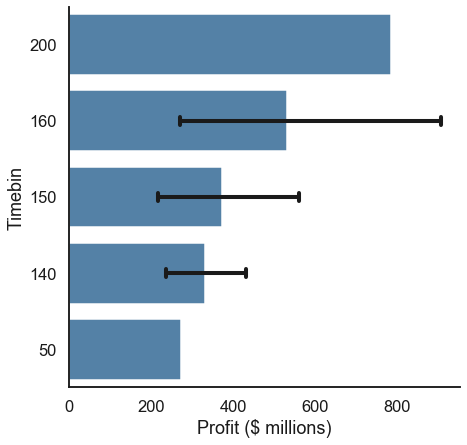

In [9]:
display(groupby_aggr(movie_data,'timebin').head())
data_bar_graph(movie_data,'timebin')

## Further analysis...
### Looking at each factor by year:

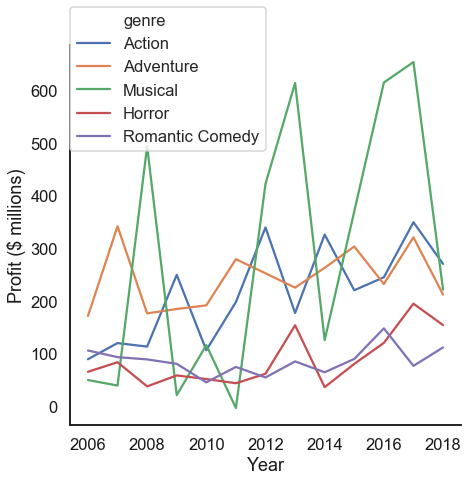

In [10]:
data_line_graph(movie_data, 'genre')

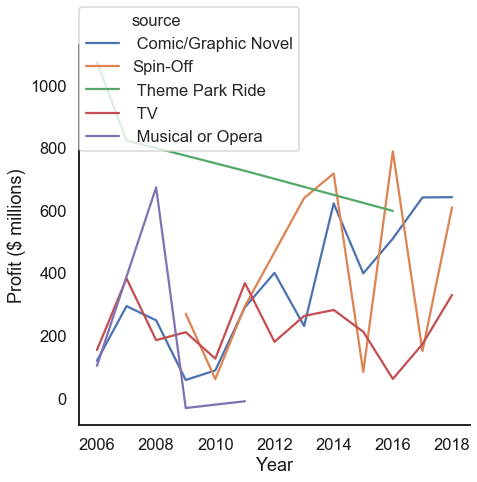

In [11]:
data_line_graph(movie_data, 'source')

### Future work:
- Script analysis - what storylines draw audience to boxoffice?
- Review analysis - are more reviews bringing in more revenues?
- Actor/Director analysis - Oscar winners?
- ***Which movie attributes are the most important?